In [1]:
from Module import *
from TrainAlgorithms import *
from keras.datasets import mnist
import time
from sklearn import preprocessing

In [2]:
# def sum(x):
#     return x.sum(0)

In [3]:
path="../../../../Data/malware-classification/"
with open(path+'data11.npy', 'rb') as f:
    transxtrain=np.load(f)
    transx_test=np.load(f)
    transytrain=np.load(f)
    transy_test=np.load(f)
xtr=torch.from_numpy(transxtrain).float()
xte=torch.from_numpy(transx_test).float()
ytr=torch.from_numpy(transytrain).long()
yte=torch.from_numpy(transy_test).long()
# scaler = preprocessing.Normalizer().fit(xtr)
# x_tr = torch.tensor(scaler.transform(xtr))
# x_te = torch.tensor(scaler.transform(xte))

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train=torch.from_numpy(x_train).float().reshape(60000,784)
x_test=torch.from_numpy(x_test).float().reshape(10000,784)
y_train=torch.from_numpy(y_train).long()
y_test=torch.from_numpy(y_test).long()
scaler = preprocessing.Normalizer().fit(x_train)
x_train = torch.tensor(scaler.transform(x_train))
x_test = torch.tensor(scaler.transform(x_test))

In [17]:
#with midway neuralhd
print(np.mean(accs))
print(np.median(accs))

0.58795
0.597825


In [19]:
print(np.mean(accs))
print(np.median(accs))

0.58062994
0.58117497


In [18]:
accs=[]
for i in range(0,10):
    model=HDCModel(10,784,1000, classh=gaussian_kernel(0,1,10,784))
    model.classes=model.encode(x_train[:10])
    block=TrainBlock([FebHDVersion2(64,.0001)])#32,.0001),ResetLowVarianceDims(.1),FebHDVersion2(32,.0001)])
    train_start(model,FebHDRepeater(block,maxreps=20),x_train,y_train)
    acc=eval_inferred_acc(model,x_train,y_train)
    print(acc)
    accs.append(acc)

/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/GeneralHDC/Module.py:62: UserWarning: An output with one or more elements was resized since it had shape [784, 1000], which does not match the required output shape [10, 1000].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)
/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/GeneralHDC/Module.py:62: UserWarning: An output with one or more elements was resized since it had shape [784, 1000], which does not match the required output shape [416, 1000].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, i

tensor(0.0824)
tensor(0.6770)
tensor(0.8662)
tensor(0.9140)
tensor(0.9320)
tensor(0.9426)
tensor(0.9474)
tensor(0.9518)
tensor(0.9632)
tensor(0.9769)
tensor(0.9868)
tensor(0.9910)
tensor(0.9938)
tensor(0.9954)
tensor(0.9965)
tensor(0.9972)
tensor(0.9980)
tensor(0.9982)
tensor(0.9987)
tensor(0.9990)
tensor(0.6172)
tensor(0.0803)
tensor(0.6737)
tensor(0.8583)
tensor(0.9253)
tensor(0.9481)
tensor(0.9556)
tensor(0.9640)
tensor(0.9712)
tensor(0.9765)
tensor(0.9802)
tensor(0.9842)
tensor(0.9874)
tensor(0.9890)
tensor(0.9900)
tensor(0.9912)
tensor(0.9917)
tensor(0.9914)
tensor(0.9909)
tensor(0.9903)
tensor(0.9893)
tensor(0.5562)
tensor(0.0617)
tensor(0.6791)
tensor(0.8660)
tensor(0.9239)
tensor(0.9419)
tensor(0.9514)
tensor(0.9596)
tensor(0.9671)
tensor(0.9722)
tensor(0.9752)
tensor(0.9796)
tensor(0.9831)
tensor(0.9860)
tensor(0.9876)
tensor(0.9903)
tensor(0.9916)
tensor(0.9923)
tensor(0.9930)
tensor(0.9934)
tensor(0.9940)
tensor(0.6298)
tensor(0.0843)
tensor(0.6661)
tensor(0.8652)
tensor(0.9

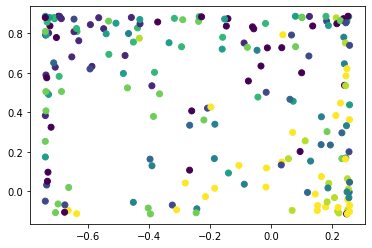

In [10]:
normed_classes=torch.nn.functional.normalize(model.classes)
var = torch.var(normed_classes, 0) 
# assert len(var) == self.dimensionality
# rank each entry in variances from smallest to largest
order = torch.argsort(var)
x=model.encode(x_train[:200])[:,order[-1]]
y=model.encode(x_train[:200])[:,order[-2]]
plt.scatter(x,y,c=model(x_train[:200]))

In [11]:
torch.mode(y_train).values

tensor(1)

tensor(0.6185)

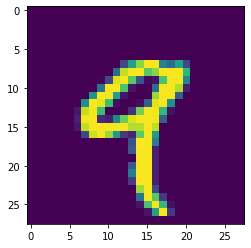

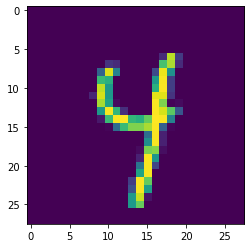

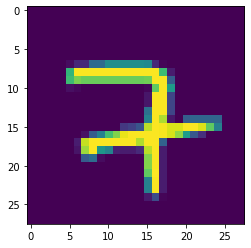

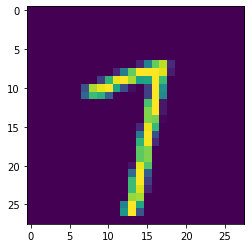

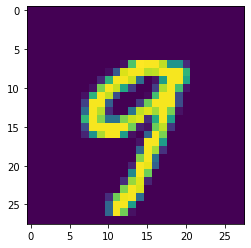

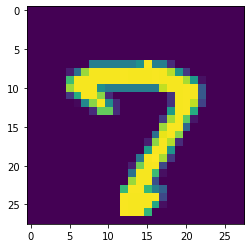

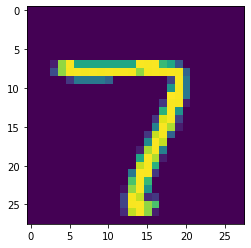

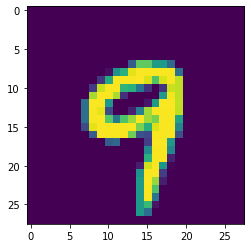

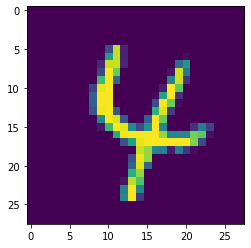

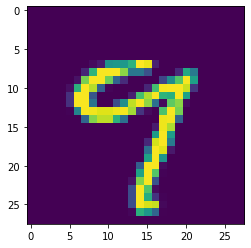

In [159]:
for i in range(0,10):
    plt.imshow(x_train[labels==4][i].reshape(28,28))
    plt.show()


In [93]:
model=HDCModel(10,784,1000)
smallnet=OnlineHDv2(15,4,.0001)
train_start(model,smallnet,x_train,labels)

In [94]:
eval_acc(model,x_train,labels)

tensor(0.9607)

In [95]:
model.classes.shape

torch.Size([10, 1000])

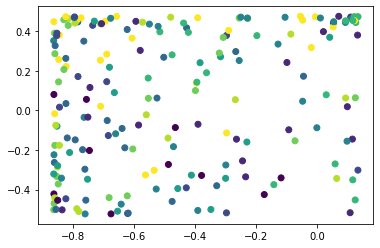

In [96]:
normed_classes=torch.nn.functional.normalize(model.classes[0:2])
var = torch.var(normed_classes, 0) 
# assert len(var) == self.dimensionality
# rank each entry in variances from smallest to largest
order = torch.argsort(var)
x=model.encode(x_train[:200])[:,order[-1]]
y=model.encode(x_train[:200])[:,order[-2]]
plt.scatter(x,y,c=model(x_train[:200]))

In [28]:
x_train.mean(0).unsqueeze(0).shape

torch.Size([1, 784])

In [38]:
cos_cdist(model.encode(x_train[19:20]),model.classes)/cos_cdist(model.encode(x_train),model.classes).mean(0).unsqueeze(0)

tensor([[0.9645, 1.0320, 0.9918, 1.0242, 0.9849, 1.0150, 1.0066, 0.9608, 1.0338,
         1.0102]])

In [22]:
model(x_train[:20])

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
def binary(y_train, label):
    y_new=torch.ones((y_train.shape))
    for i in range(y_train.shape[0]):
        if y_train[i]==label:
            y_new[i]=0
        else:
            y_train[i]=1
    return y_new


In [11]:
medians=[]
means=[]
timemeans=[]
for j in range(0,5):
    print("lap " + str(j))
    accs=[]
    times=[]
    for _ in range(0,50):
        print(j)
        # trainblock=TrainBlock()
        # trainblock.append_component(ClassicVersion2(64,.0001))
        # trainblock.append_component(Normalize())
        # trainblock=TrainBlock(
        #     [Normalize(),TrainRepeater(ClassicVersion2(64,.0001),15)]
        # )
        # neuralHD=TrainRepeater(trainblock,5)
        # encodedprinter=DebugPrinter("train",sum)
        model=HDCModel(10,257,2048)
        print("starting training")
        start=time.time()
        # print("a")
        train_start(model,SingleStopv2(50,j,4,.0001,.0001),xtr,ytr) 
        # print(eval_acc(model,xtr,ytr))
        # print("c")
        # print(j)
        # train_start(model,Normalize(),xtr,ytr)
        # train_start(model,OnlineHDv2(1,1,.0001),xtr,ytr) 
        print("model done")
        end=time.time()
        acc=eval_acc(model,xte,yte)
        accs.append(acc)
        time_=end-start
        times.append(time_)
        print("end inner loop")

    print("started analysis")
    medians.append(np.median(accs))
    means.append(np.mean(accs))
    timemeans.append(np.mean(times))
    print("started analysis")


lap 0
0
starting training
model done
end inner loop
0
starting training
model done
end inner loop
0
starting training
model done
end inner loop
0
starting training
model done
end inner loop
0
starting training
model done
end inner loop
0
starting training
model done
end inner loop
0
starting training
model done
end inner loop
0
starting training
model done
end inner loop
0
starting training
model done
end inner loop
0
starting training
model done
end inner loop
0
starting training
model done
end inner loop
0
starting training
model done
end inner loop
0
starting training
model done
end inner loop
0
starting training
model done
end inner loop
0
starting training
model done
end inner loop
0
starting training
model done
end inner loop
0
starting training
model done
end inner loop
0
starting training
model done
end inner loop
0
starting training
model done
end inner loop
0
starting training
model done
end inner loop
0
starting training
model done
end inner loop
0
starting training
model do

In [12]:
print(medians)
print(means)

[0.9486566, 0.95951414, 0.96117043, 0.9606183, 0.96135443]
[0.93659186, 0.9594553, 0.9609791, 0.9607434, 0.96128815]


In [10]:
print(medians)
print(means)

[0.9493927, 0.95933014, 0.96153843, 0.96117043, 0.9617225]
[0.93806404, 0.9595363, 0.9613397, 0.9617593, 0.9620759]


In [8]:
print(medians)
print(means)

[0.9412955, 0.95951414, 0.96190655, 0.9604343, 0.9635627]
[0.91564226, 0.9603607, 0.96161205, 0.9600295, 0.9634155]


In [6]:
print(medians)
print(means)

[0.9409275, 0.9609864, 0.9596982, 0.9631947, 0.9598822]
[0.9290762, 0.96054476, 0.95977175, 0.96315795, 0.95973504]


In [11]:
print(medians)
print(means)

[0.9471844, 0.95914614, 0.96117043, 0.96153843, 0.95951414]
[0.9433199, 0.959919, 0.96039754, 0.96094954, 0.9602135]


In [ ]:
#ep1,bs4096
#[tensor(0.8896), tensor(0.9139), tensor(0.8360), tensor(0.9037), tensor(0.9137), tensor(0.8855), tensor(0.9116), tensor(0.9074), tensor(0.9140), tensor(0.9164)]
print(medians)
print(means)

In [193]:
#ep1,bs1024
#[tensor(0.9558), tensor(0.9554), tensor(0.9528), tensor(0.9533), tensor(0.9503), tensor(0.9530), tensor(0.9538), tensor(0.9506), tensor(0.9530), tensor(0.9510)]
print(medians)
print(means)

[0.953]
[0.95290005]


In [191]:
#ep1,bs256
#[tensor(0.9591), tensor(0.9588), tensor(0.9652), tensor(0.9479), tensor(0.9612), tensor(0.9671), tensor(0.9636), tensor(0.9661), tensor(0.9653), tensor(0.9614)]
print(medians)
print(means)

[0.9625]
[0.96156996]


In [188]:
#ep1,bs64
#[tensor(0.9528), tensor(0.9680), tensor(0.9593), tensor(0.9593), tensor(0.9564), tensor(0.9601), tensor(0.9627), tensor(0.9619), tensor(0.9576), tensor(0.9486)]
print(medians)
print(means)

[0.9593]
[0.95866996]


In [186]:
#ep1,bs16
#[tensor(0.9577), tensor(0.9673), tensor(0.9526), tensor(0.9460), tensor(0.9511), tensor(0.9620), tensor(0.9702), tensor(0.9457), tensor(0.9499), tensor(0.9693)]
print(medians)
print(means)

[0.95515]
[0.95718]


In [184]:
#ep1,bs4
#[tensor(0.9634), tensor(0.9619), tensor(0.9656), tensor(0.9533), tensor(0.9322), tensor(0.9638), tensor(0.9631), tensor(0.9679), tensor(0.9496), tensor(0.9467)]
print(medians)
print(means)

[0.9625]
[0.95675004]


In [182]:
#ep1,bs1
#[tensor(0.9376), tensor(0.9460), tensor(0.9488), tensor(0.9513), tensor(0.9546), tensor(0.9426), tensor(0.9618), tensor(0.9448), tensor(0.9501), tensor(0.9649)]
print(medians)
print(means)

[0.94945]
[0.95025]


In [83]:
xtr.shape

torch.Size([8151, 257])

In [84]:
model.encode(xtr).shape

torch.Size([8151, 2048])

In [88]:
model_=HDCModel(10,2048,2048)
scaler = preprocessing.Normalizer().fit(model.encode(xtr))
xtr_ = torch.tensor(scaler.transform(model.encode(xtr)))
xte_ = torch.tensor(scaler.transform(model.encode(xte)))
train_start(model_,OnlineHDv2(51,4,.0001),xtr_,ytr) 
train_start(model_,Normalize(),xtr_,ytr)
train_start(model_,OnlineHDv2(1,1,.0001),xtr_,ytr) 


/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/GeneralHDC/Module.py:62: UserWarning: An output with one or more elements was resized since it had shape [257, 2048], which does not match the required output shape [184, 2048].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)
/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/GeneralHDC/Module.py:62: UserWarning: An output with one or more elements was resized since it had shape [257, 2048], which does not match the required output shape [184, 2048].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, 

In [24]:
means

[0.1019, 0.1012, 0.1017, 0.1013, 0.1023]

In [25]:
timemeans

[24.53918218612671,
 25.691676139831543,
 25.76329278945923,
 27.414631843566895,
 27.638856887817383]

In [ ]:
tensor(0.9584)
tensor(0.9643)
tensor(0.9621)
tensor(0.9603)
tensor(0.9610)
tensor(0.9621)
tensor(0.9647)
tensor(0.9610)
tensor(0.9603)
tensor(0.9621)

In [63]:
np.median(diffs)

-0.01748252

In [61]:
np.median(diffs)

-0.019506812

In [59]:
np.median(diffs)

-0.008833259

In [57]:
np.median(diffs)

-0.014906168

In [ ]:
model=HDCModel(9,257,1000)

In [48]:
# model=HDCModel(9,257,1000)
train_start(model,OnlineHDv2(10,64,.0001),xtr,ytr)
train_start(model,Normalize(),xtr,ytr)

In [46]:
model.basis[:]=model.basis+torch.normal(0,1,(1000,257))

In [49]:
print(eval_acc(model,xte,yte))

tensor(0.8693)


In [7]:

for i in range(0,10):
    # trainblock=TrainBlock()
    # trainblock.append_component(ClassicVersion2(64,.0001))
    # trainblock.append_component(Normalize())
    trainblock=TrainBlock(
        [Normalize(),TrainRepeater(ClassicVersion2(64,.0001),15)]
    )
    neuralHD=TrainRepeater(trainblock,5)
    encodedprinter=DebugPrinter("train",sum)
    model=HDCModel(9,257,1000, kernel=None)

    train_start(model,neuralHD,xtr,ytr)

    print(eval_acc(model,xte,yte))

/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/GeneralHDC/Module.py:59: UserWarning: An output with one or more elements was resized since it had shape [257, 1000], which does not match the required output shape [184, 1000].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)
/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/GeneralHDC/Module.py:59: UserWarning: An output with one or more elements was resized since it had shape [257, 1000], which does not match the required output shape [147, 1000].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, 

tensor(0.9477)
tensor(0.9529)
tensor(0.9481)
tensor(0.9547)
tensor(0.9518)
tensor(0.9481)
tensor(0.9514)
tensor(0.9452)
tensor(0.9474)
tensor(0.9466)


In [10]:
xtr.size(1)

257

In [ ]:
kwargs=kwargs
trainblock.apply(model,)

In [6]:
def test_args_kwargs(arg1, arg2):
    print("arg1:", arg1)
    print("arg2:", arg2)
    print("arg3:", arg3)

In [10]:
model.basis.shape

torch.Size([1000, 257])

In [34]:
array=torch.zeros(3,5)

In [35]:
def changearray(array):
    array[:]=torch.ones(3,5)

In [36]:
changearray(array)

In [37]:
array

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])